# Chapter 5 - Basic Math and Statistics
## Segment 4 - Summarizing categorical data using pandas

Categorical data is described by how observations are distributed across the variable's categories. <br>
Basic ways to describe categorical variables: counts, variable description, grouping

In [2]:
import numpy as np
import pandas as pd

### The basics

In [3]:
address = 'C:/Users/.../Ex_Files_Python_Data_Science_EssT_Pt_1/Exercise Files/Data/mtcars.csv'

cars = pd.read_csv(address)

cars.columns = ['car_names','mpg','cyl','disp','hp','drat','wt','qsec','vs','am','gear','carb']
cars.index = cars.car_names
cars.head(15)

,car_names,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
car_names,,,,,,,,,,,,
Mazda RX4,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
Valiant,Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
Duster 360,Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
Merc 240D,Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
Merc 230,Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2


In [4]:
carb = cars.carb
carb.value_counts()

2    10
4    10
1     7
3     3
6     1
8     1
Name: carb, dtype: int64

In [5]:
cars_cat = cars[['cyl', 'vs', 'am', 'gear', 'carb']]
cars_cat.head()

,cyl,vs,am,gear,carb
car_names,,,,,
Mazda RX4,6,0,1,4,4
Mazda RX4 Wag,6,0,1,4,4
Datsun 710,4,1,1,4,1
Hornet 4 Drive,6,1,0,3,1
Hornet Sportabout,8,0,0,3,2


In [7]:
gears_group = cars_cat.groupby('gear')
gears_group.describe()

cyl                                                 vs            ...  \
     count      mean       std  min  25%  50%  75%  max count      mean  ...   
gear                                                                     ...   
3     15.0  7.466667  1.187234  4.0  8.0  8.0  8.0  8.0  15.0  0.200000  ...   
4     12.0  4.666667  0.984732  4.0  4.0  4.0  6.0  6.0  12.0  0.833333  ...   
5      5.0  6.000000  2.000000  4.0  4.0  6.0  8.0  8.0   5.0  0.200000  ...   

       am       carb                                               
      75%  max count      mean       std  min  25%  50%  75%  max  
gear                                                               
3     0.0  0.0  15.0  2.666667  1.175139  1.0  2.0  3.0  4.0  4.0  
4     1.0  1.0  12.0  2.333333  1.302678  1.0  1.0  2.0  4.0  4.0  
5     1.0  1.0   5.0  4.400000  2.607681  2.0  2.0  4.0  6.0  8.0  

[3 rows x 32 columns]

### Transforming variables to categorical data type

In [12]:
# created a new categorie called 'group'
cars['group'] = pd.Series(cars.gear, dtype='category')

In [13]:
cars['group'].dtypes

CategoricalDtype(categories=[3, 4, 5], ordered=False)

In [14]:
cars['group'].value_counts()

3    15
4    12
5     5
Name: group, dtype: int64

### Describing categorical data with crosstabs

In [15]:
pd.crosstab(cars['am'], cars['gear'])

gear,3,4,5
am,,,
0,15,4,0
1,0,8,5


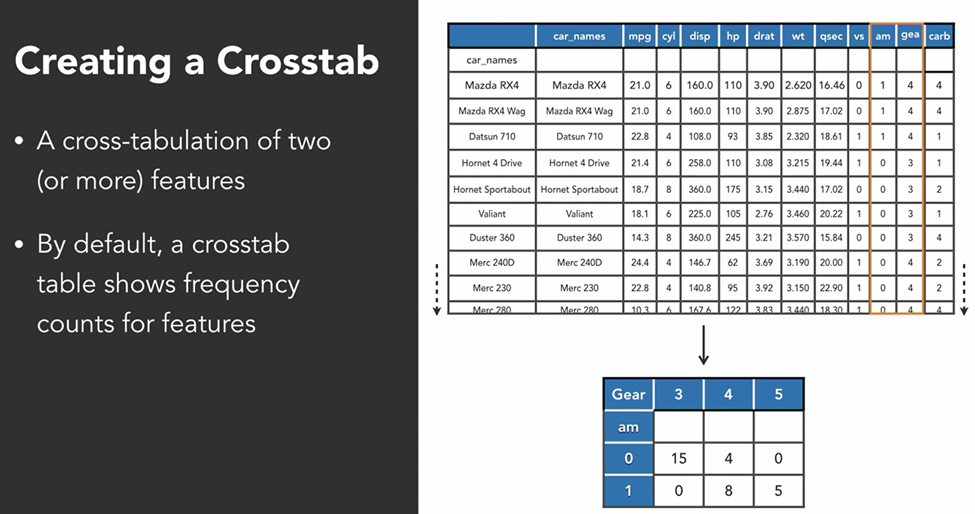

’am’- manual transmission <br>
This cross-table described to us basically about how gears are broken up with respect to automatic and manual transmission.<br>
Cars with a manual transmission, they mostly have 3 gears, but cars that have an automatic transmission are more likely to have 5 gears.<br>
It’s basically showing a distribution of gear counts based on the type of car transmission. 
